<a href="https://colab.research.google.com/github/noorehira/ProgrammingForAI/blob/main/CV_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Truth value 2 pie r**
truth function= f(r)=sin(2πr/10)
---



---



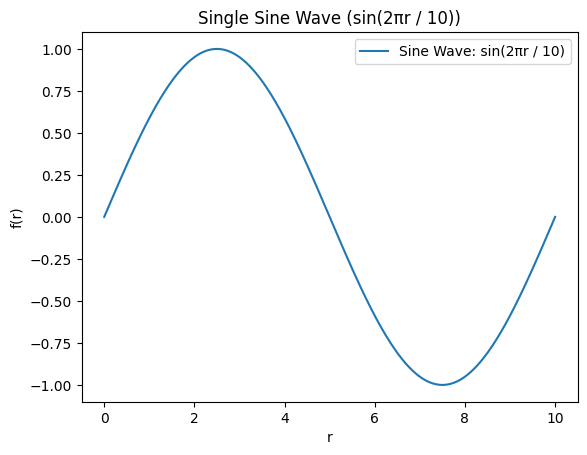

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate a single sine wave
r = np.linspace(0, 10, 1000)  # 1000 points between 0 and 10
f = np.sin(2 * np.pi * r / 10)  # Single sine wave: sin(2πr / 10)

# Plot the sine wave
plt.plot(r, f, label='Sine Wave: sin(2πr / 10)')
plt.title('Single Sine Wave (sin(2πr / 10))')
plt.xlabel('r')
plt.ylabel('f(r)')
plt.legend()
plt.show()


## Random points

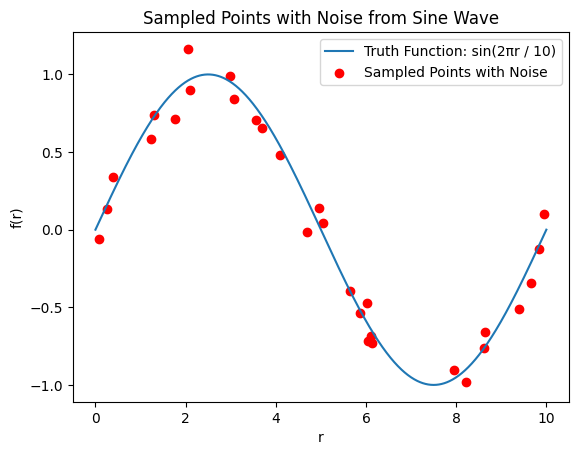

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1 (for context): Generate a single sine wave
r = np.linspace(0, 10, 1000)  # 1000 points between 0 and 10
f = np.sin(2 * np.pi * r / 10)  # Single sine wave: sin(2πr / 10)

# Step 2: Sample the function at random locations and add noise
num_samples = 30  # Number of random points to sample
random_points = np.random.choice(r, size=num_samples, replace=False)  # Randomly select 30 points from 'r'

# Add some random noise to the sampled values
noise = np.random.normal(0, 0.1, size=num_samples)  # Noise with mean 0 and standard deviation 0.1
sampled_values = np.sin(2 * np.pi * random_points / 10) + noise  # Get the values at these random points with noise

# Plot the sampled points with noise
plt.plot(r, f, label='Truth Function: sin(2πr / 10)')
plt.scatter(random_points, sampled_values, color='red', label='Sampled Points with Noise')
plt.title('Sampled Points with Noise from Sine Wave')
plt.xlabel('r')
plt.ylabel('f(r)')
plt.legend()
plt.show()


poly degree=polinomial fit degree/ M in equation

coefficients are the weight in equation

then finding polinomial curve on coefficients

then computing fitted value for the whole array of points we created in step 1


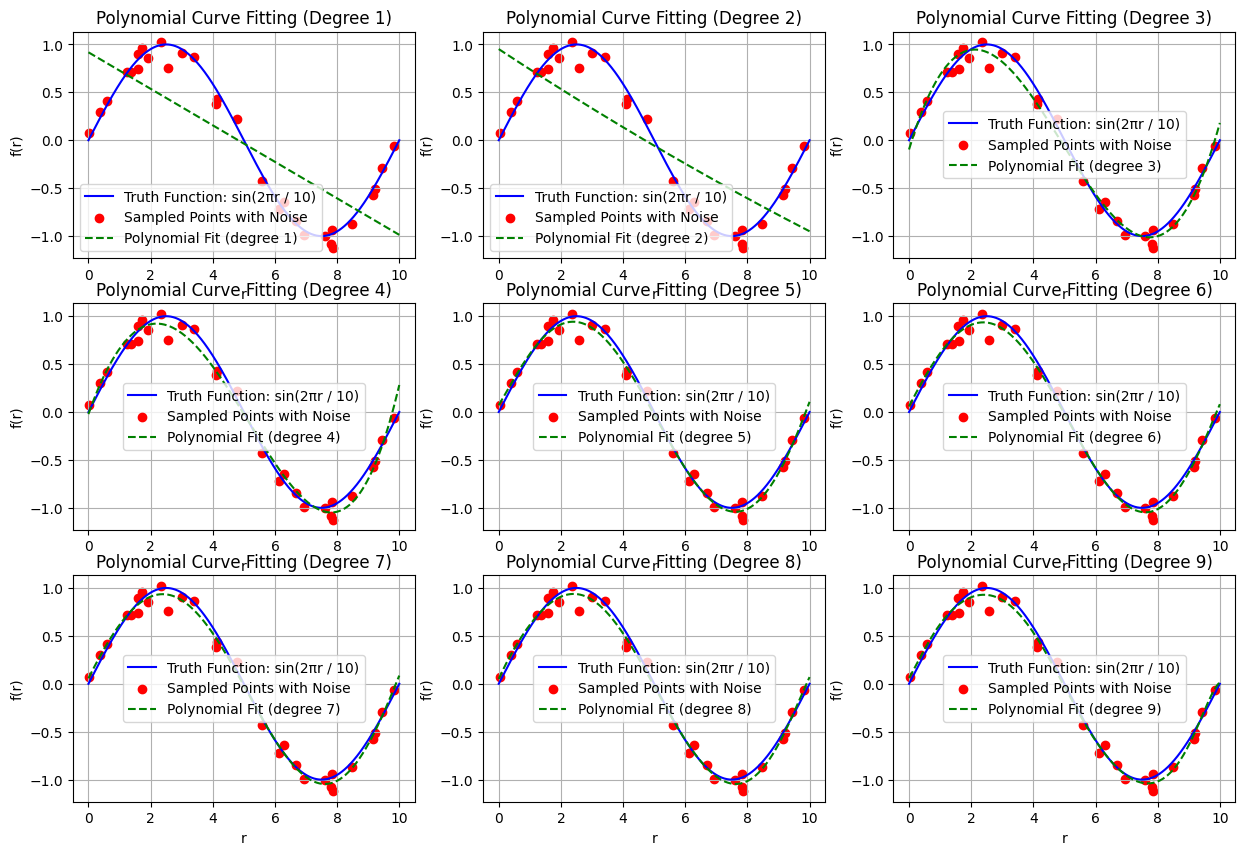

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate the original sine wave function
r = np.linspace(0, 10, 1000)  # 1000 points between 0 and 10
f = np.sin(2 * np.pi * r / 10)  # Original function: sin(2πr / 10)

# Step 2: Sample the function at random locations and add noise
num_samples = 30  # Number of random points to sample
random_points = np.random.choice(r, size=num_samples, replace=False)  # Randomly select 30 points from 'r'
noise = np.random.normal(0, 0.1, size=num_samples)  # Noise with mean 0 and standard deviation 0.1
sampled_values = np.sin(2 * np.pi * random_points / 10) + noise  # Get values with noise

# Create a figure to hold the subplots
plt.figure(figsize=(15, 10))

# Loop over polynomial degrees from 1 to 9
for poly_degree in range(1, 10):
    # Step 3: Fit a polynomial curve to the noisy data points
    coefficients = np.polyfit(random_points, sampled_values, poly_degree)  # Polynomial fitting
    polynomial = np.poly1d(coefficients)  # Generate the polynomial function

    # Generate values of the fitted polynomial over the original 'r' range
    fitted_values = polynomial(r)

    # Create a subplot for each degree
    plt.subplot(3, 3, poly_degree)  # 3 rows and 3 columns of subplots
    plt.plot(r, f, label='Truth Function: sin(2πr / 10)', color='blue')  # Original function
    plt.scatter(random_points, sampled_values, color='red', label='Sampled Points with Noise')  # Sampled noisy points
    plt.plot(r, fitted_values, label=f'Polynomial Fit (degree {poly_degree})', linestyle='--', color='green')  # Fitted polynomial
    plt.title(f'Polynomial Curve Fitting (Degree {poly_degree})')
    plt.xlabel('r')
    plt.ylabel('f(r)')
    plt.legend()
    plt.grid()

#


# **Calculation Error**

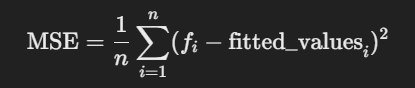

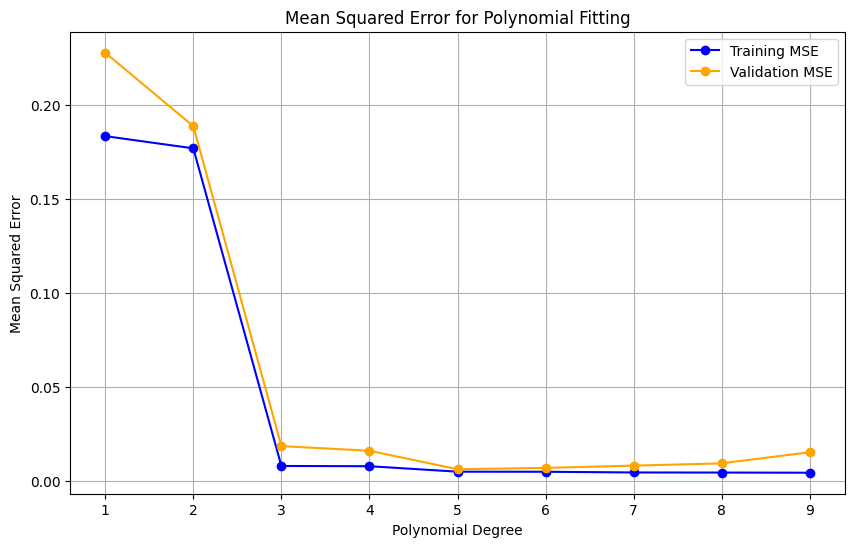

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate the original sine wave function
r = np.linspace(0, 10, 1000)  # 1000 points between 0 and 10
f = np.sin(2 * np.pi * r / 10)  # Original function: sin(2πr / 10)

# Step 2: Sample the function at random locations and add noise
num_samples = 30  # Number of random points to sample
random_points = np.random.choice(r, size=num_samples, replace=False)  # Randomly select points
noise = np.random.normal(0, 0.1, size=num_samples)  # Noise with mean 0 and std deviation 0.1
sampled_values = np.sin(2 * np.pi * random_points / 10) + noise  # Get values with noise

# Split the sampled data into training (80%) and validation (20%)
split_index = int(0.8 * num_samples)
train_points = random_points[:split_index]
train_values = sampled_values[:split_index]
val_points = random_points[split_index:]
val_values = sampled_values[split_index:]

# Prepare lists to store MSE values
train_mse_values = []
val_mse_values = []

# Loop over polynomial degrees from 1 to 9
for poly_degree in range(1, 10):
    # Step 3: Fit a polynomial curve to the training data
    coefficients = np.polyfit(train_points, train_values, poly_degree)  # Polynomial fitting
    polynomial = np.poly1d(coefficients)  # Generate the polynomial function

    # Generate values of the fitted polynomial over the original 'r' range
    fitted_values_train = polynomial(train_points)
    fitted_values_val = polynomial(val_points)

    # Calculate Mean Squared Error (MSE) for training and validation
    train_mse = np.mean((train_values - fitted_values_train)**2)  # Training MSE
    val_mse = np.mean((val_values - fitted_values_val)**2)  # Validation MSE

    train_mse_values.append(train_mse)  # Store training MSE
    val_mse_values.append(val_mse)  # Store validation MSE

# Plotting the MSE for training and validation
plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), train_mse_values, marker='o', label='Training MSE', color='blue')
plt.plot(range(1, 10), val_mse_values, marker='o', label='Validation MSE', color='orange')
plt.title('Mean Squared Error for Polynomial Fitting')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.xticks(range(1, 10))
plt.grid()
plt.legend()
plt.show()


# Over fitting and underfitting

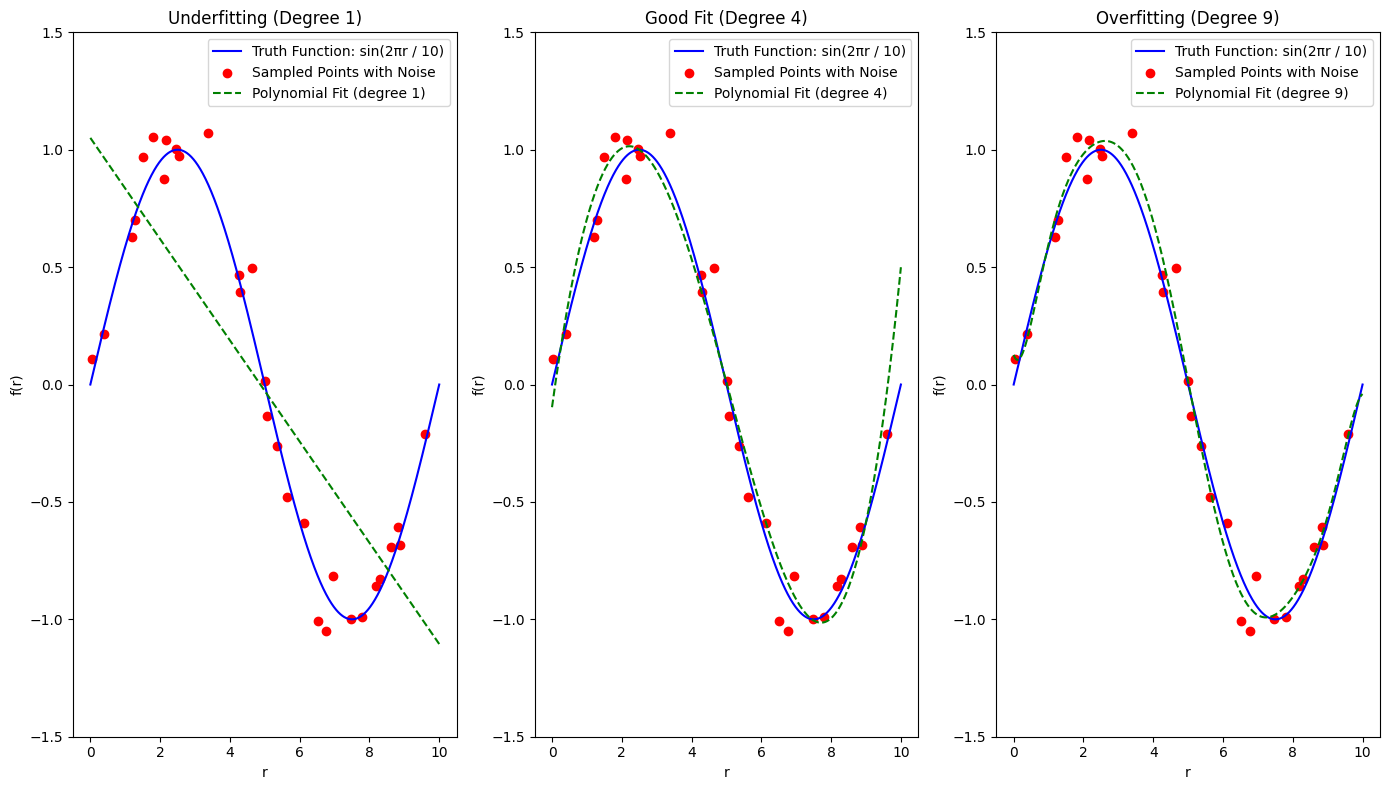

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate the original sine wave function
r = np.linspace(0, 10, 1000)  # 1000 points between 0 and 10
f = np.sin(2 * np.pi * r / 10)  # Original function: sin(2πr / 10)

# Step 2: Sample the function at random locations and add noise
num_samples = 30  # Number of random points to sample
random_points = np.random.choice(r, size=num_samples, replace=False)  # Randomly select points
noise = np.random.normal(0, 0.1, size=num_samples)  # Noise with mean 0 and std deviation 0.1
sampled_values = np.sin(2 * np.pi * random_points / 10) + noise  # Get values with noise

# Plotting the results for different polynomial degrees
plt.figure(figsize=(14, 8))

# Underfitting with a linear polynomial (degree 1)
degree = 1
coefficients = np.polyfit(random_points, sampled_values, degree)
polynomial = np.poly1d(coefficients)
fitted_values = polynomial(r)

plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st subplot
plt.plot(r, f, label='Truth Function: sin(2πr / 10)', color='blue')
plt.scatter(random_points, sampled_values, color='red', label='Sampled Points with Noise')
plt.plot(r, fitted_values, label=f'Polynomial Fit (degree {degree})', linestyle='--', color='green')
plt.title(f'Underfitting (Degree {degree})')
plt.xlabel('r')
plt.ylabel('f(r)')
plt.legend()
plt.ylim(-1.5, 1.5)

# Good fit with a polynomial (degree 4)
degree = 4
coefficients = np.polyfit(random_points, sampled_values, degree)
polynomial = np.poly1d(coefficients)
fitted_values = polynomial(r)

plt.subplot(1, 3, 2)  # 1 row, 3 columns, 2nd subplot
plt.plot(r, f, label='Truth Function: sin(2πr / 10)', color='blue')
plt.scatter(random_points, sampled_values, color='red', label='Sampled Points with Noise')
plt.plot(r, fitted_values, label=f'Polynomial Fit (degree {degree})', linestyle='--', color='green')
plt.title(f'Good Fit (Degree {degree})')
plt.xlabel('r')
plt.ylabel('f(r)')
plt.legend()
plt.ylim(-1.5, 1.5)

# Overfitting with a high-degree polynomial (degree 9)
degree = 9
coefficients = np.polyfit(random_points, sampled_values, degree)
polynomial = np.poly1d(coefficients)
fitted_values = polynomial(r)

plt.subplot(1, 3, 3)  # 1 row, 3 columns, 3rd subplot
plt.plot(r, f, label='Truth Function: sin(2πr / 10)', color='blue')
plt.scatter(random_points, sampled_values, color='red', label='Sampled Points with Noise')
plt.plot(r, fitted_values, label=f'Polynomial Fit (degree {degree})', linestyle='--', color='green')
plt.title(f'Overfitting (Degree {degree})')
plt.xlabel('r')
plt.ylabel('f(r)')
plt.legend()
plt.ylim(-1.5, 1.5)

plt.tight_layout()
plt.show()


# Cross Validation

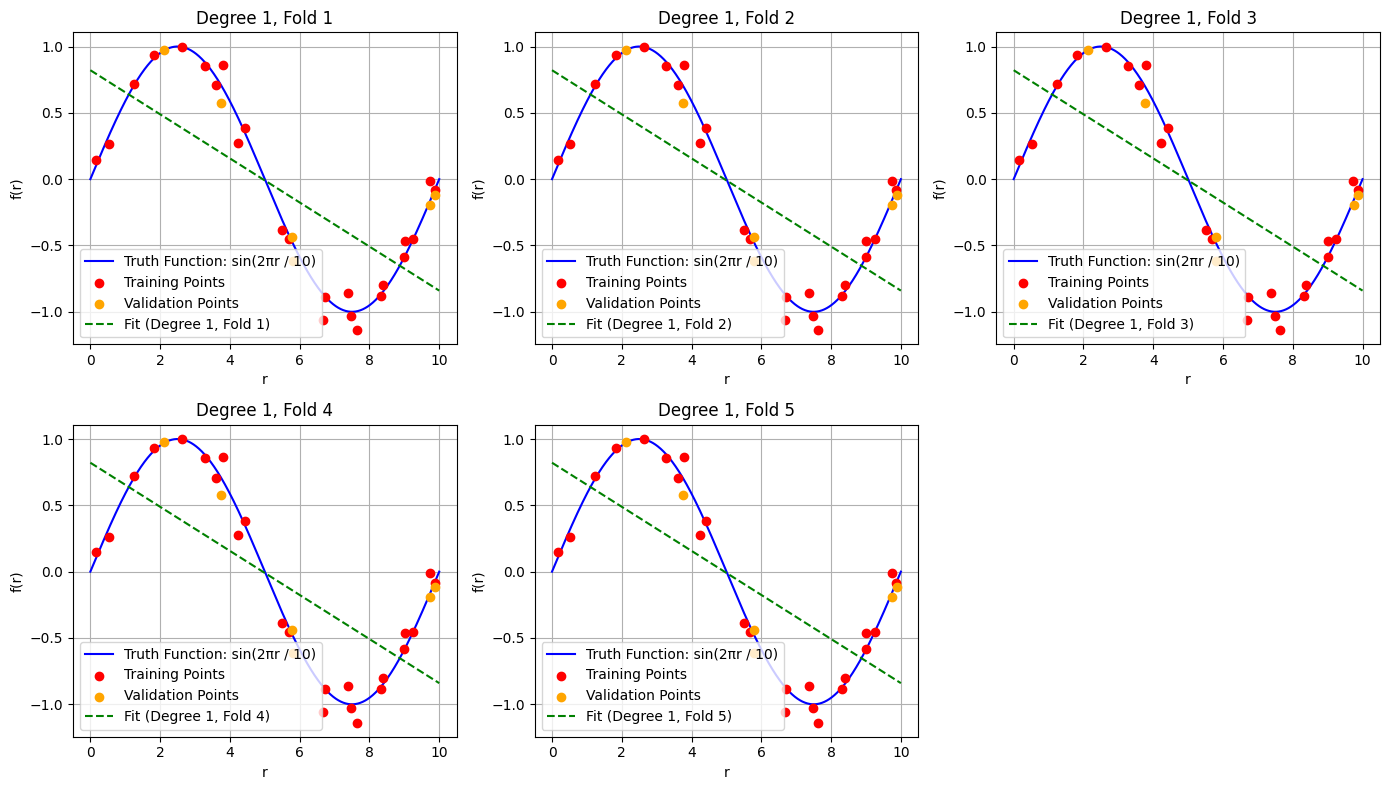

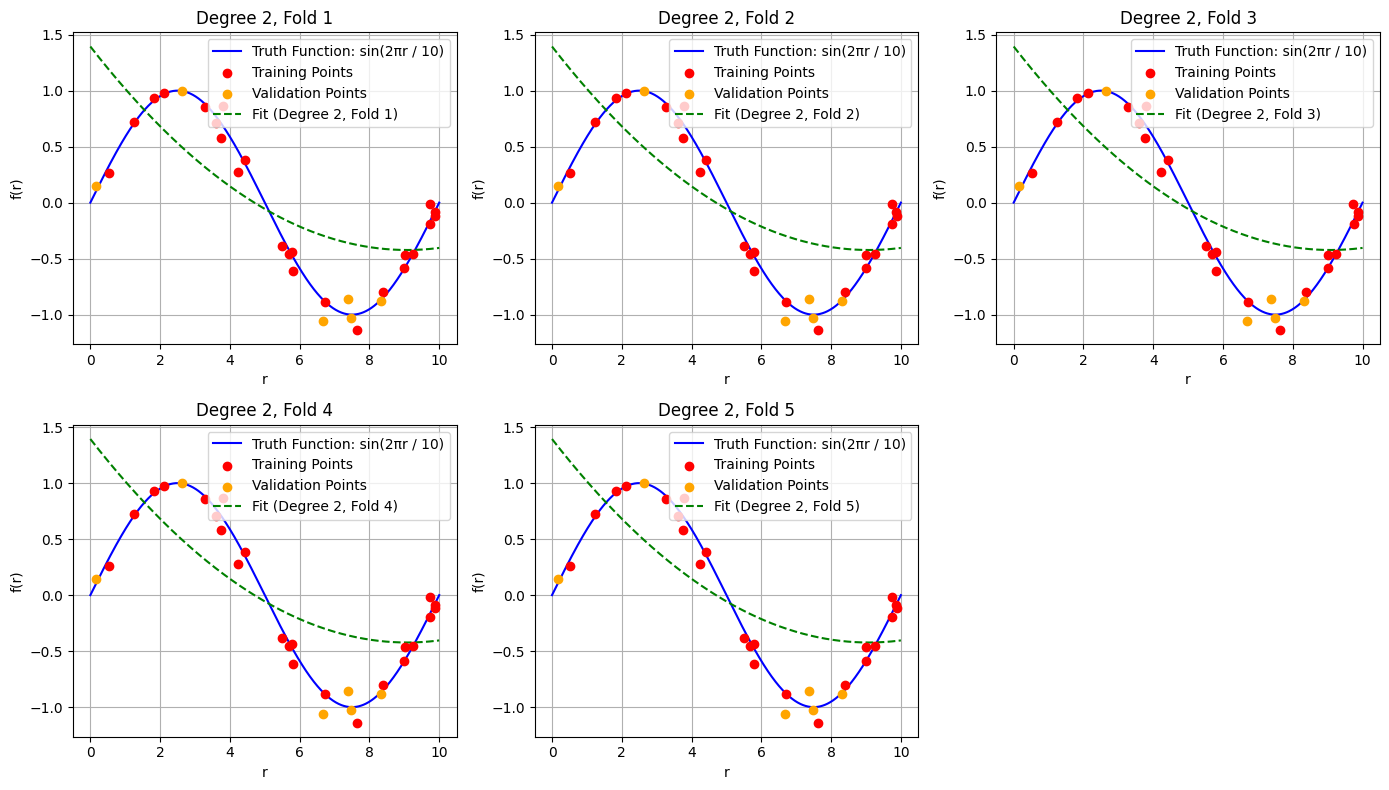

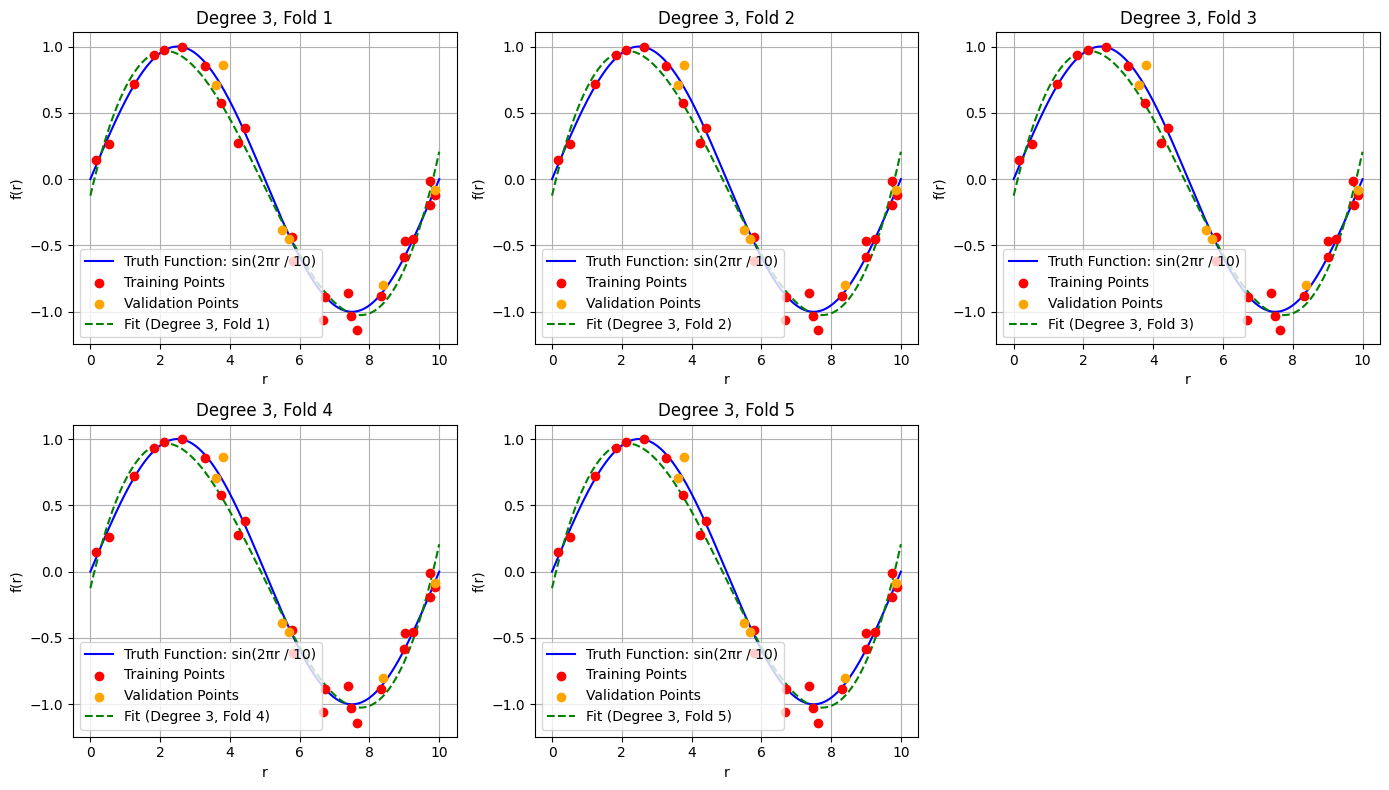

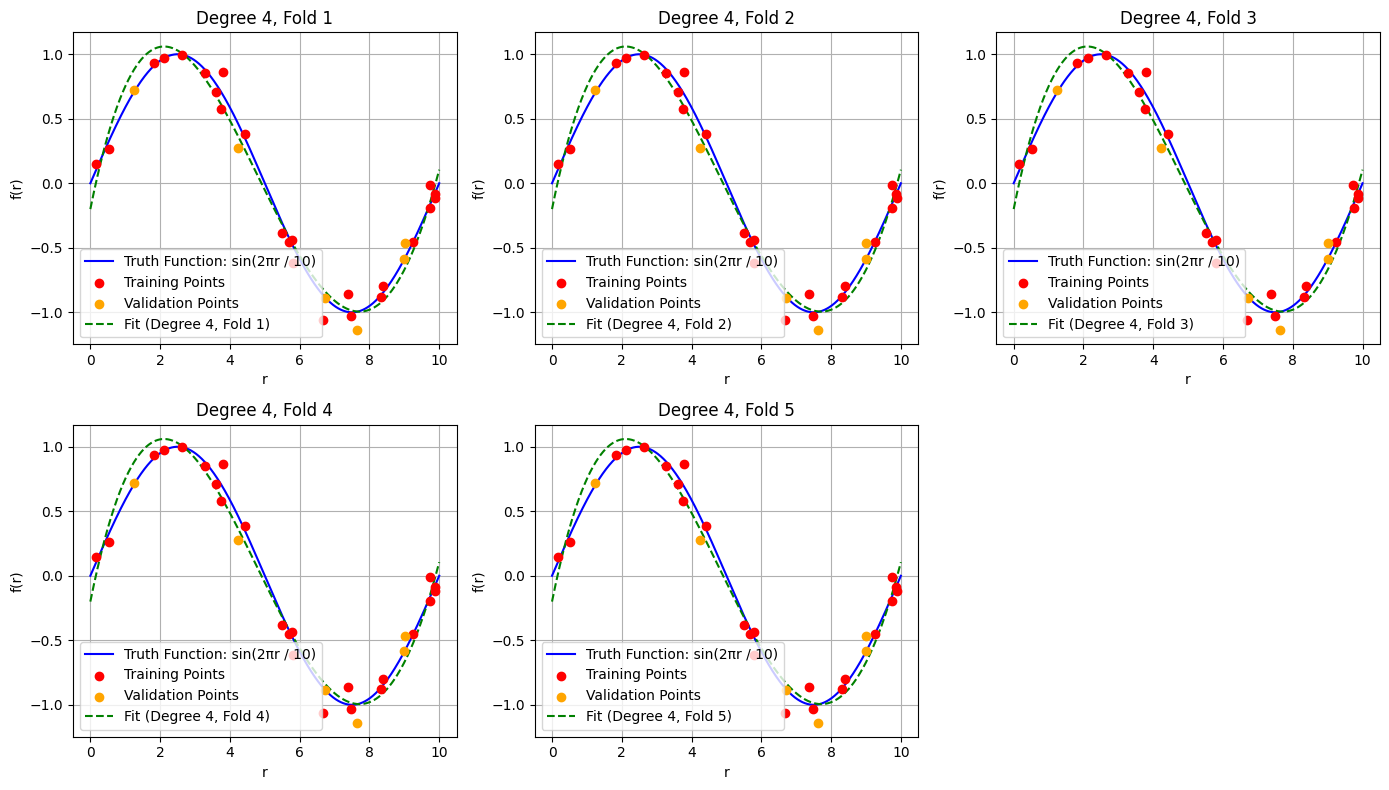

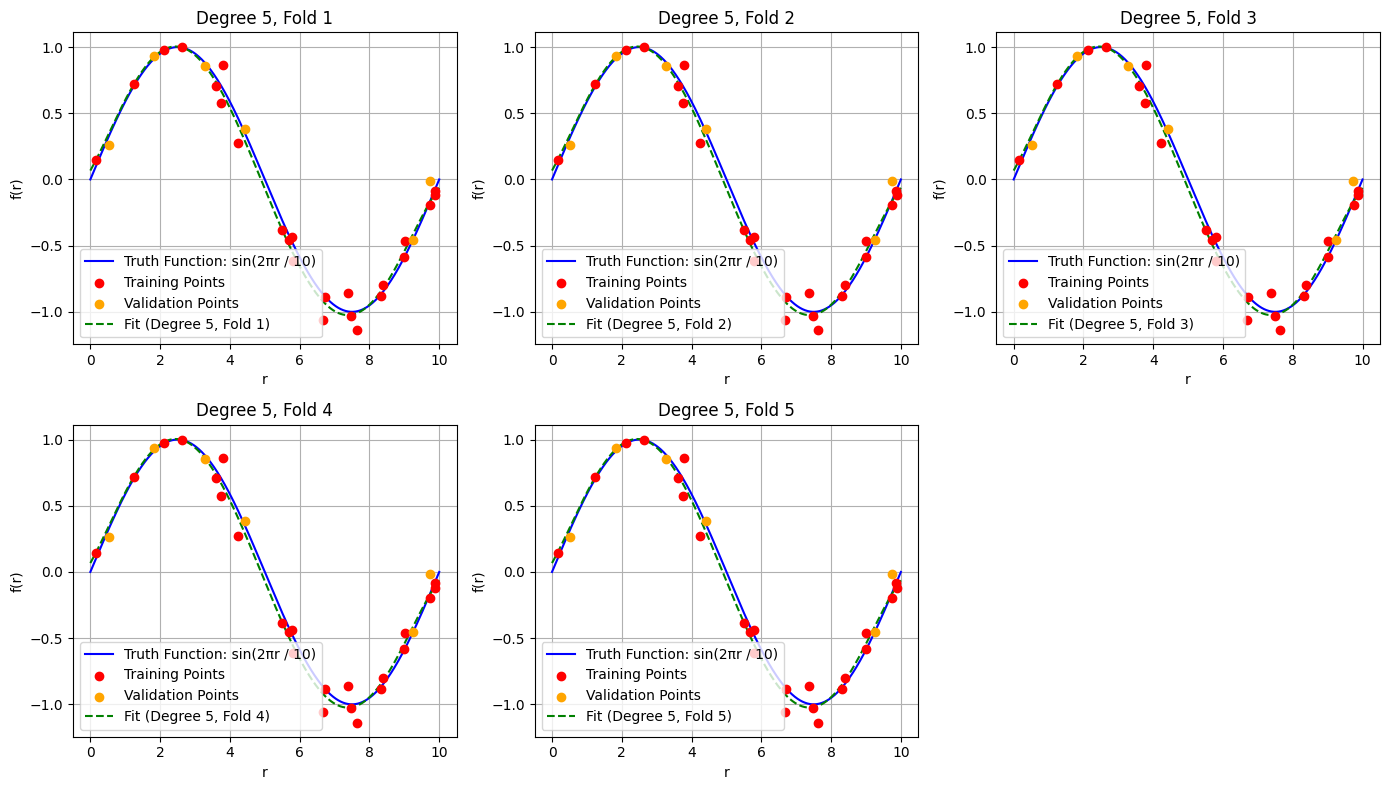

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate the original sine wave function
r = np.linspace(0, 10, 1000)  # 1000 points between 0 and 10
f = np.sin(2 * np.pi * r / 10)  # Original function: sin(2πr / 10)

# Step 2: Sample the function at random locations and add noise
num_samples = 30  # Number of random points to sample
random_points = np.random.choice(r, size=num_samples, replace=False)  # Randomly select points
noise = np.random.normal(0, 0.1, size=num_samples)  # Noise with mean 0 and std deviation 0.1
sampled_values = np.sin(2 * np.pi * random_points / 10) + noise  # Get noisy values

# Function to create polynomial features
def polynomial_features(X, degree):
    return np.vander(X, degree + 1)

# Step 3: Set up polynomial degrees and k-fold parameters
degrees = range(1, 6)  # Polynomial degrees to test (1 to 5)
k = 5  # Number of folds for cross-validation

# K-Fold Cross Validation
indices = np.arange(num_samples)
np.random.shuffle(indices)  # Shuffle indices for cross-validation
fold_sizes = np.full(k, num_samples // k, dtype=int)
fold_sizes[:num_samples % k] += 1  # Handle case where num_samples isn't perfectly divisible
current = 0

# Loop over degrees to fit the model
for degree in degrees:
    num_cols = (k + 1) // 2  # Calculate number of columns for even distribution
    num_rows = 2 if k > 1 else 1  # Two rows if there are more than one fold
    plt.figure(figsize=(14, 8))

    fold_number = 1  # Initialize fold number

    for fold in range(k):
        # Create train and validation sets
        start, stop = current, current + fold_sizes[fold]
        val_indices = indices[start:stop]
        train_indices = np.concatenate((indices[:start], indices[stop:]))

        X_train = random_points[train_indices]
        y_train = sampled_values[train_indices]
        X_val = random_points[val_indices]
        y_val = sampled_values[val_indices]

        # Generate polynomial features
        X_poly_train = polynomial_features(X_train, degree)

        # Fit the model using the normal equation
        weights = np.linalg.inv(X_poly_train.T @ X_poly_train) @ (X_poly_train.T @ y_train)

        # Predict on the full range of r for plotting
        X_poly_full = polynomial_features(r, degree)
        y_fit = X_poly_full @ weights

        # Plot the original function, training data, and the fit
        plt.subplot(num_rows, num_cols, fold_number)
        plt.plot(r, f, label='Truth Function: sin(2πr / 10)', color='blue')
        plt.scatter(X_train, y_train, color='red', label='Training Points', zorder=5)
        plt.scatter(X_val, y_val, color='orange', label='Validation Points', zorder=5)
        plt.plot(r, y_fit, label=f'Fit (Degree {degree}, Fold {fold + 1})', linestyle='--', color='green')
        plt.title(f'Degree {degree}, Fold {fold + 1}')
        plt.xlabel('r')
        plt.ylabel('f(r)')
        plt.legend()
        plt.grid()

        fold_number += 1  # Increment fold number

    plt.tight_layout()
    plt.show()

    current += fold_sizes[fold]
    current = current % num_samples  # Reset current index after one full pass through


# Regularization setting lambda

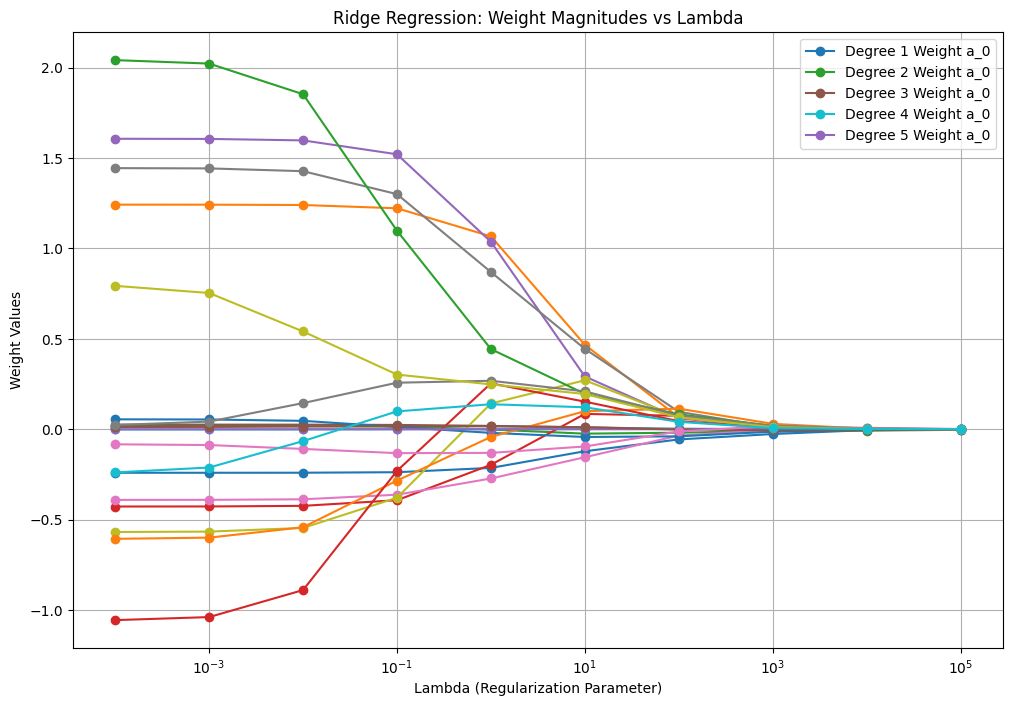

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate the original sine wave function
r = np.linspace(0, 10, 1000)  # 1000 points between 0 and 10
f = np.sin(2 * np.pi * r / 10)  # Original function: sin(2πr / 10)

# Step 2: Sample the function at random locations and add noise
num_samples = 30  # Number of random points to sample
random_points = np.random.choice(r, size=num_samples, replace=False)  # Randomly select points
noise = np.random.normal(0, 0.1, size=num_samples)  # Noise with mean 0 and std deviation 0.1
sampled_values = np.sin(2 * np.pi * random_points / 10) + noise  # Get noisy values

# Function to create polynomial features
def polynomial_features(X, degree):
    return np.vander(X, degree + 1)

# Step 3: Fit the model for degrees 1 to 5 and collect weights for different lambda values
degrees = range(1, 6)  # Polynomial degrees to test (1 to 5)
lambda_values = [10**i for i in range(-4, 6)]  # Lambda values from 10^-7 to 10^0 (big to small)

# Initialize a dictionary to store coefficients for each degree and lambda
coefficients = {degree: [] for degree in degrees}

for degree in degrees:
    # Generate polynomial features
    X_poly = polynomial_features(random_points, degree)

    for lambda_ in lambda_values:
        # Regularization term
        regularization_matrix = lambda_ * np.eye(degree + 1)

        # Fit the model using the normal equation with regularization
        weights = np.linalg.inv(X_poly.T @ X_poly + regularization_matrix) @ (X_poly.T @ sampled_values)

        # Store the coefficients for this degree and lambda
        coefficients[degree].append(weights)

# Step 4: Plot the weights
plt.figure(figsize=(12, 8))

# Loop through each degree of the polynomial and plot the corresponding weights
for degree in degrees:
    for i in range(degree + 1):
        plt.plot(lambda_values, [coeff[i] for coeff in coefficients[degree]], marker='o', label=f'Degree {degree} Weight a_{i}' if i == 0 else "")

# Set the x-axis to a logarithmic scale
plt.xscale('log')  # Log scale for lambda values
plt.title('Ridge Regression: Weight Magnitudes vs Lambda')
plt.xlabel('Lambda (Regularization Parameter)')
plt.ylabel('Weight Values')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()
